<a href="https://colab.research.google.com/github/StevenEscobarC/Inteligentes2-parcial1/blob/main/Parcial_Inteligentes_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Montaje Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from scipy.io import arff
import pandas as pd
import numpy as np
import random
from sklearn import datasets
#Importacion de módulo para dividir el dataset
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
#Normalización de los datos
from sklearn.preprocessing import MinMaxScaler
#Importación knn
from sklearn.neighbors import KNeighborsClassifier
# Import Naivebayes
from sklearn.naive_bayes import GaussianNB
#Importación de matriz de confusión
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
#Importación grafica de matriz de confusión
import seaborn as sns
#nuevas importaciones
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
# Para árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# PARA REVISAR DISTRIBUCIÓN DE LA NORMALIDAD
from scipy.stats import normaltest

# PARA REVISAR LA CORRELACIÓN DE LOS DATOS
import seaborn as sb

#
from sklearn.preprocessing import LabelEncoder

#Importación de la regresión logistica
from sklearn.linear_model import LogisticRegression

# Para árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
# para validación cruzada
from sklearn.model_selection import cross_val_score
# Maquinas
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error

import plotly.express as px

from sklearn.model_selection import cross_val_score

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [ ]:
data = pd.read_csv("/content/drive/Shareddrives/Inteligentes 2/chronic_kidney_disease.csv")
df = pd.DataFrame(data)

SE CAMBIA LOS TIPOS DE DATOS DE ACUERDO CON EL DATASET ORIGINAL

In [ ]:
df['pcv'] = df['pcv'].astype('float64')
df['wbcc'] = df['wbcc'].astype('float64')
df['rbcc'] = df['rbcc'].astype('float64')

#CAMBIO DE CATEGORICOS A FLOTANTES DESPUÉS DE REVISAR EL DATASET, DETERMINAMOS QUE ERAN NUMÉRICOS
df['sg'] = df['sg'].astype('float64')
df['al'] = df['al'].astype('float64')
df['su'] = df['su'].astype('float64')


In [ ]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


VERIFICAR TIPO DE DATOS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

REVISAR CUANTOS DATOS FALTANTES HAY EN EL DATASET

In [ ]:
df.isnull().sum()  # indica cuantos datos nulos hay por atributo

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

REEMPLAZAR DATOS FALTANTES NUMÉRICOS

In [ ]:
df.replace('?', np.nan, inplace=True)

In [ ]:
df = df.fillna(df.mean(numeric_only=True)) # aplicar media a datos númericos faltantes

#categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Reemplazar los valores nulos en las columnas categóricas con la moda de cada columna
#for col in categorical_cols:
    #df[col].fillna(df[col].mode(), inplace=True)
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,1.262500,0.972500,0.125000,0.075000,148.036517,...,38.884498,8406.122449,4.707435,0.377500,3.310000,1.090000,0.210000,0.195000,0.15500,0.375000
std,16.974966,13.476298,0.005369,1.272318,1.029487,0.655491,0.593823,0.360138,0.299331,74.782634,...,8.151081,2523.219976,0.840314,0.495588,0.591417,0.319618,0.413918,0.402965,0.36921,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,101.000000,...,34.000000,6975.000000,4.500000,0.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,54.000000,78.234536,1.017408,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,126.000000,...,38.884498,8406.122449,4.707435,0.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,64.000000,80.000000,1.020000,2.000000,0.450142,2.000000,1.000000,0.000000,0.000000,150.000000,...,44.000000,9400.000000,5.100000,1.000000,4.000000,1.000000,0.000000,0.000000,0.00000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,490.000000,...,54.000000,26400.000000,8.000000,2.000000,5.000000,3.000000,2.000000,2.000000,2.00000,1.000000


In [ ]:
df.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.000000,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.000000,...,44.0,7800.000000,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.000000,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,148.036517,...,38.0,6000.000000,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.000000,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.000000,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.000000,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.000000,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.000000,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.000000,4.600000,no,no,no,good,no,no,ckd
5,60.0,90.000000,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.000000,...,39.0,7800.000000,4.400000,yes,yes,no,good,yes,no,ckd
6,68.0,70.000000,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.000000,...,36.0,8406.122449,4.707435,no,no,no,good,no,no,ckd
7,24.0,76.469072,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.000000,...,44.0,6900.000000,5.000000,no,yes,no,good,yes,no,ckd
8,52.0,100.000000,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.000000,...,33.0,9600.000000,4.000000,yes,yes,no,good,no,yes,ckd
9,53.0,90.000000,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.000000,...,29.0,12100.000000,3.700000,yes,yes,no,poor,no,yes,ckd


TRATAMIENTO DE DATOS CATEGORICOS NOMINALES FALTANTES

In [ ]:
X=df.drop(['class'],axis=1)
y=df['class']


def impute_mode(feature):
    mode = X[feature].mode()[0]
    X[feature] = X[feature].fillna(mode)

In [ ]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in categorical_cols[:-1]:
    impute_mode(col)

In [ ]:
# Obtener el nombre de las columnas con datos categóricos
categorical_cols = df.select_dtypes(include='object').columns.tolist()
#df.describe()

In [ ]:
df.isnull().sum()  # indica cuantos datos nulos hay por atributo

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [ ]:
df_numeric = df.select_dtypes(include='number')
df_numeric.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.000000,1.020,1.0,0.0,2,1,0,0,121.000000,...,44.0,7800.000000,5.200000,1,4,1,0,0,0,0
1,7.0,50.000000,1.020,4.0,0.0,2,1,0,0,148.036517,...,38.0,6000.000000,4.707435,0,3,1,0,0,0,0
2,62.0,80.000000,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.000000,4.707435,0,4,1,1,0,1,0
3,48.0,70.000000,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.000000,3.900000,1,3,1,1,1,1,0
4,51.0,80.000000,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.000000,4.600000,0,3,1,0,0,0,0
5,60.0,90.000000,1.015,3.0,0.0,2,2,0,0,74.000000,...,39.0,7800.000000,4.400000,1,4,1,0,1,0,0
6,68.0,70.000000,1.010,0.0,0.0,2,1,0,0,100.000000,...,36.0,8406.122449,4.707435,0,3,1,0,0,0,0
7,24.0,76.469072,1.015,2.0,4.0,1,0,0,0,410.000000,...,44.0,6900.000000,5.000000,0,4,1,0,1,0,0
8,52.0,100.000000,1.015,3.0,0.0,1,0,1,0,138.000000,...,33.0,9600.000000,4.000000,1,4,1,0,0,1,0
9,53.0,90.000000,1.020,2.0,0.0,0,0,1,0,70.000000,...,29.0,12100.000000,3.700000,1,4,1,1,0,1,0


<Axes: title={'center': 'Chronic Kidney Disease'}>

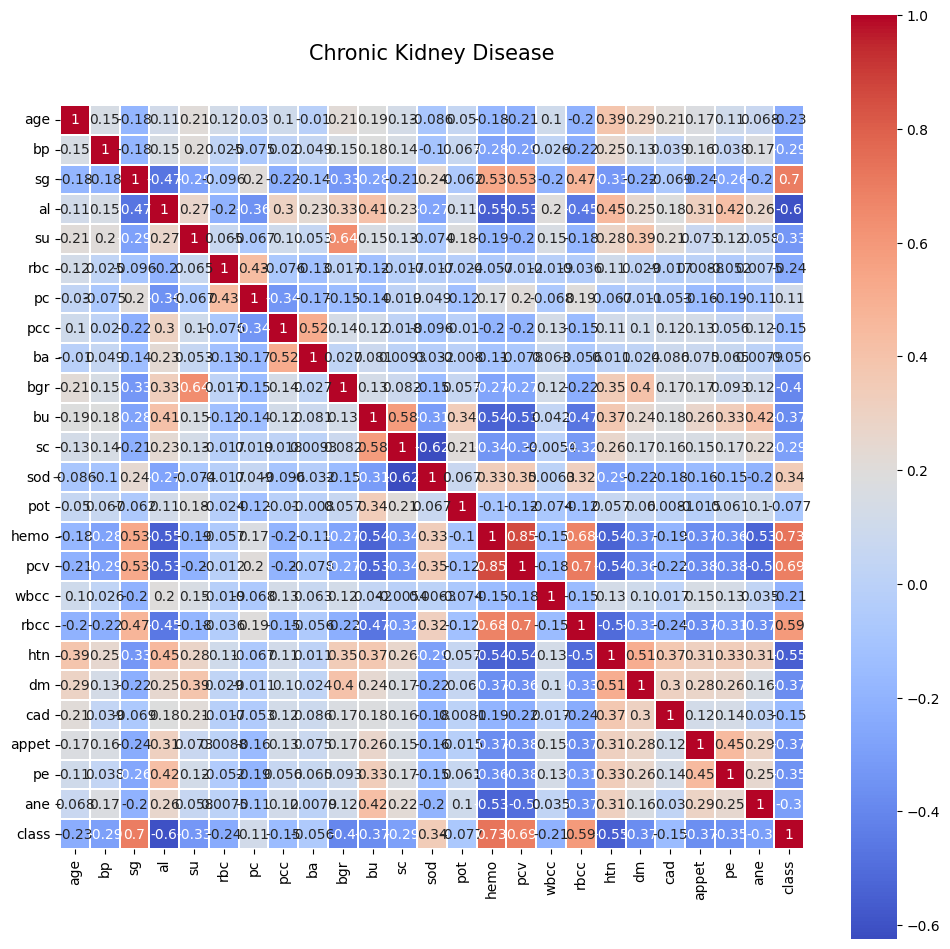

In [ ]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(12,12))
plt.title('Chronic Kidney Disease', y=1.05, size=15)
sb.heatmap(df_numeric.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

TRATAMIENTO DE DATOS ATÍPICOS

In [ ]:
# Definir los cuartiles (25%, 50%, 75%)
quartiles = df.quantile([0.25, 0.5, 0.75])

# Definir el rango intercuartílico (IQR)
iqr = quartiles.loc[0.75] - quartiles.loc[0.25]

# Calcular los límites inferior y superior para cada columna
iqr_lim_inf = quartiles.loc[0.25] - 1.5 * iqr
iqr_lim_sup = quartiles.loc[0.75] + 1.5 * iqr

# Aplicar el recorte iterativamente a cada columna
for column in df_numeric.columns:
        df_numeric[column + '_Capped'] = df_numeric[column].clip(lower=iqr_lim_inf[column], upper=iqr_lim_sup[column])

# **LIMPIEZA DE DATOS**

In [ ]:
# looking at unique values in categorical columns
for col in categorical_cols:
    print(f"{col} has {df[col].unique()} values\n")

rbc has [nan 'normal' 'abnormal'] values

pc has ['normal' 'abnormal' nan] values

pcc has ['notpresent' 'present' nan] values

ba has ['notpresent' 'present' nan] values

htn has ['yes' 'no' nan] values

dm has ['yes' 'no' ' yes' '        no' '        yes' nan] values

cad has ['no' 'yes' '        no' nan] values

appet has ['good' 'poor' nan] values

pe has ['no' 'yes' nan] values

ane has ['no' 'yes' nan] values



In [ ]:
for col in df_numeric:
    print(f"{col} has {df[col].unique()} values\n")

age has [48.          7.         62.         51.         60.         68.
 24.         52.         53.         50.         63.         40.
 47.         61.         21.         42.         75.         69.
 51.48337596 73.         70.         65.         76.         72.
 82.         46.         45.         35.         54.         11.
 59.         67.         15.         55.         44.         26.
 64.         56.          5.         74.         38.         58.
 71.         34.         17.         12.         43.         41.
 57.          8.         39.         66.         81.         14.
 27.         83.         30.          4.          3.          6.
 32.         80.         49.         90.         78.         19.
  2.         33.         36.         37.         23.         25.
 20.         29.         28.         22.         79.        ] values

bp has [ 80.          50.          70.          90.          76.46907216
 100.          60.         110.         140.         180.
 120.      

KeyError: ignored

In [ ]:
X[categorical_cols[:-1]].isnull().sum()

rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
dtype: int64

In [ ]:
for col in categorical_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

rbc has 2 categories

pc has 2 categories

pcc has 2 categories

ba has 2 categories

htn has 2 categories

dm has 5 categories

cad has 3 categories

appet has 2 categories

pe has 2 categories

ane has 2 categories



In [ ]:
df['dm'].replace(to_replace = {'        no':'no',' yes':'yes','        yes':'yes'},inplace=True)
df['cad'].replace(to_replace = {'        no':'no'}, inplace=True)

In [ ]:
for col in categorical_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

rbc has 2 categories

pc has 2 categories

pcc has 2 categories

ba has 2 categories

htn has 2 categories

dm has 2 categories

cad has 2 categories

appet has 2 categories

pe has 2 categories

ane has 2 categories



# **Creación de BOX PLOT**

In [ ]:
for i, column in enumerate(df_numeric.columns):
  fig = px.box(df_numeric, y=df_numeric[column], width = 600, height=400)
  fig.show()

# **Creación Histogramas**

In [ ]:
for i, column in enumerate(df_numeric.columns):
  fig = px.histogram(df_numeric, x=df_numeric[column], width=800, height=400)
  fig.show()

# **Diagramas de barras para variables categóricas**

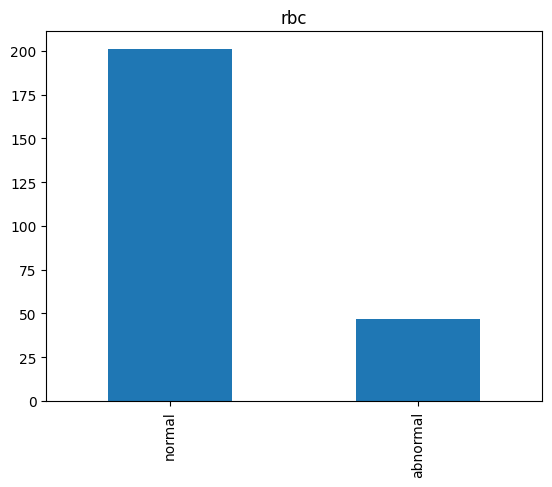

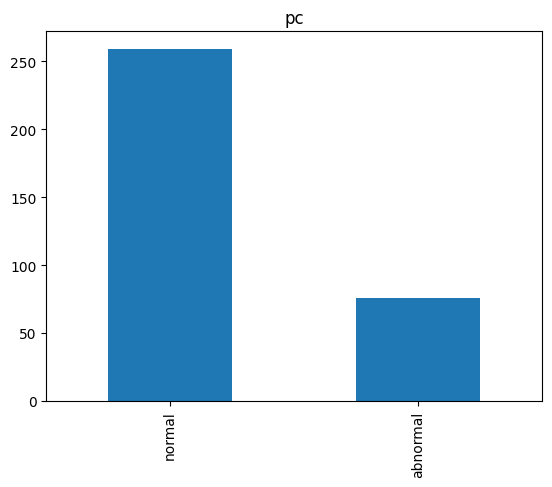

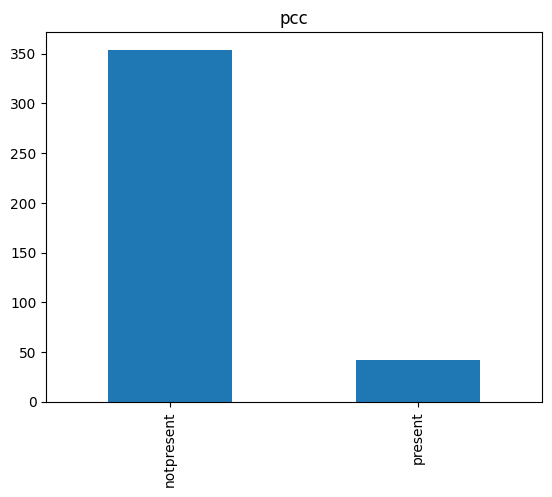

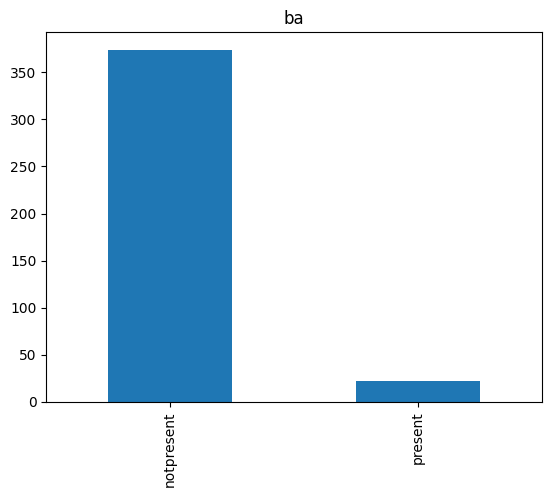

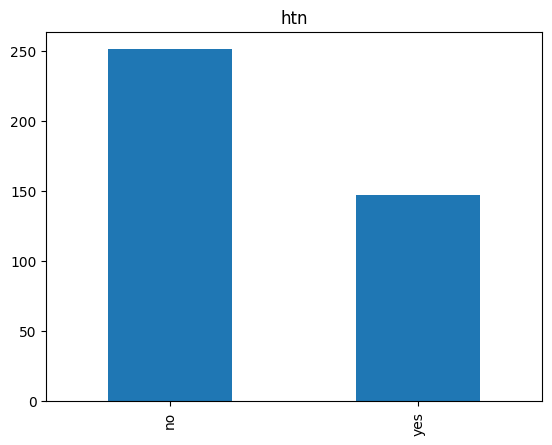

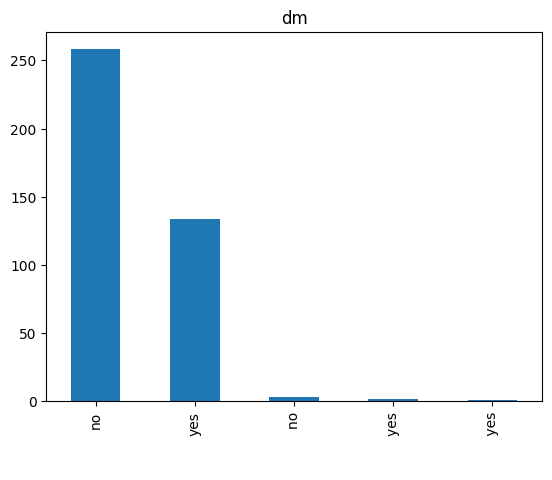

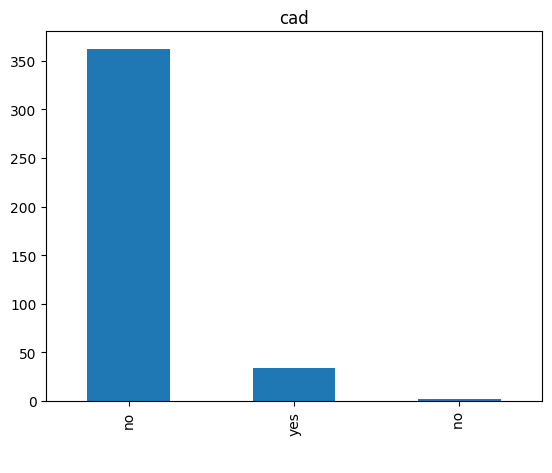

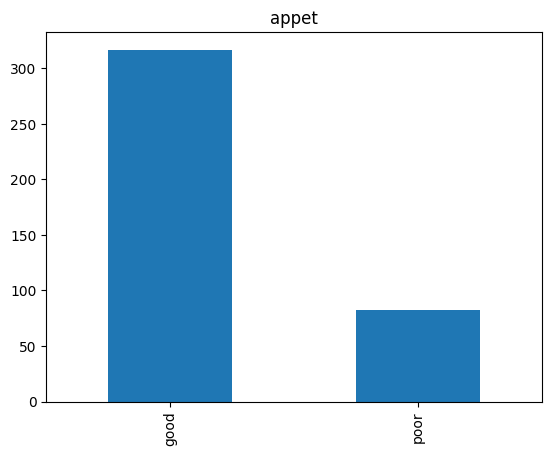

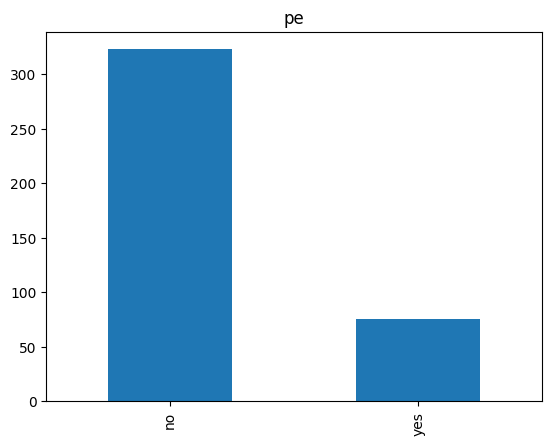

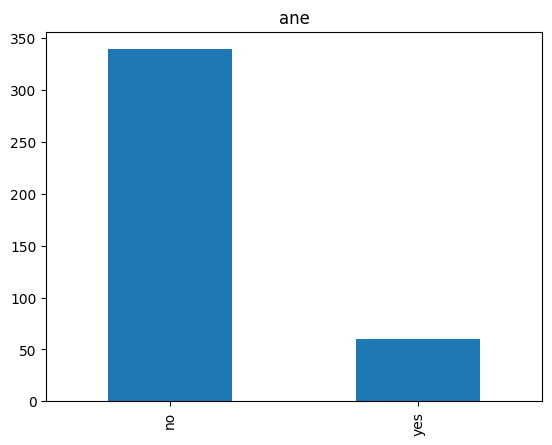

In [ ]:
from typing_extensions import dataclass_transform

categorical_cols = [col for col in data.columns if data[col].dtype == 'object' and col!= 'class'] # obteniendo los datos categoricos
# Mostrar los gráficos de barras para cada columna categórica
for col in categorical_cols:
      fig, ax = plt.subplots()
      data[col].value_counts().plot(kind='bar')
      ax.set_title(col)
      plt.show()


In [ ]:
encoder=LabelEncoder()
cat_colsAll = [col for col in df.columns if df[col].dtype == 'object']
# Obtener columnas a encodificar

for col in cat_colsAll:
    if df[col].dtype == 'object':  # Comprobar si la columna contiene datos categóricos
        df[col] = encoder.fit_transform(df[col])

df.head(15)
#X=df.drop(["class"],axis=1) # obtener valores de x
#y=df["class"] # valores de y

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.000000,1.020000,1.000000,0.000000,2,1,0,0,121.000000,...,44.000000,7800.000000,5.200000,1,4,1,0,0,0,0
1,7.0,50.000000,1.020000,4.000000,0.000000,2,1,0,0,148.036517,...,38.000000,6000.000000,4.707435,0,3,1,0,0,0,0
2,62.0,80.000000,1.010000,2.000000,3.000000,1,1,0,0,423.000000,...,31.000000,7500.000000,4.707435,0,4,1,1,0,1,0
3,48.0,70.000000,1.005000,4.000000,0.000000,1,0,1,0,117.000000,...,32.000000,6700.000000,3.900000,1,3,1,1,1,1,0
4,51.0,80.000000,1.010000,2.000000,0.000000,1,1,0,0,106.000000,...,35.000000,7300.000000,4.600000,0,3,1,0,0,0,0
5,60.0,90.000000,1.015000,3.000000,0.000000,2,2,0,0,74.000000,...,39.000000,7800.000000,4.400000,1,4,1,0,1,0,0
6,68.0,70.000000,1.010000,0.000000,0.000000,2,1,0,0,100.000000,...,36.000000,8406.122449,4.707435,0,3,1,0,0,0,0
7,24.0,76.469072,1.015000,2.000000,4.000000,1,0,0,0,410.000000,...,44.000000,6900.000000,5.000000,0,4,1,0,1,0,0
8,52.0,100.000000,1.015000,3.000000,0.000000,1,0,1,0,138.000000,...,33.000000,9600.000000,4.000000,1,4,1,0,0,1,0
9,53.0,90.000000,1.020000,2.000000,0.000000,0,0,1,0,70.000000,...,29.000000,12100.000000,3.700000,1,4,1,1,0,1,0


In [ ]:
X.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

In [ ]:
X.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.000000,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,15.4,44.0,7800.000000,5.200000,yes,yes,no,good,no,no
1,7.0,50.000000,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,11.3,38.0,6000.000000,4.707435,no,no,no,good,no,no
2,62.0,80.000000,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,9.6,31.0,7500.000000,4.707435,no,yes,no,poor,no,yes
3,48.0,70.000000,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,11.2,32.0,6700.000000,3.900000,yes,no,no,poor,yes,yes
4,51.0,80.000000,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,11.6,35.0,7300.000000,4.600000,no,no,no,good,no,no
5,60.0,90.000000,1.015,3.0,0.0,normal,normal,notpresent,notpresent,74.000000,...,12.2,39.0,7800.000000,4.400000,yes,yes,no,good,yes,no
6,68.0,70.000000,1.010,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,12.4,36.0,8406.122449,4.707435,no,no,no,good,no,no
7,24.0,76.469072,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.000000,...,12.4,44.0,6900.000000,5.000000,no,yes,no,good,yes,no
8,52.0,100.000000,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.000000,...,10.8,33.0,9600.000000,4.000000,yes,yes,no,good,no,yes
9,53.0,90.000000,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.000000,...,9.5,29.0,12100.000000,3.700000,yes,yes,no,poor,no,yes


<Axes: title={'center': 'Chronic Kidney Disease'}>

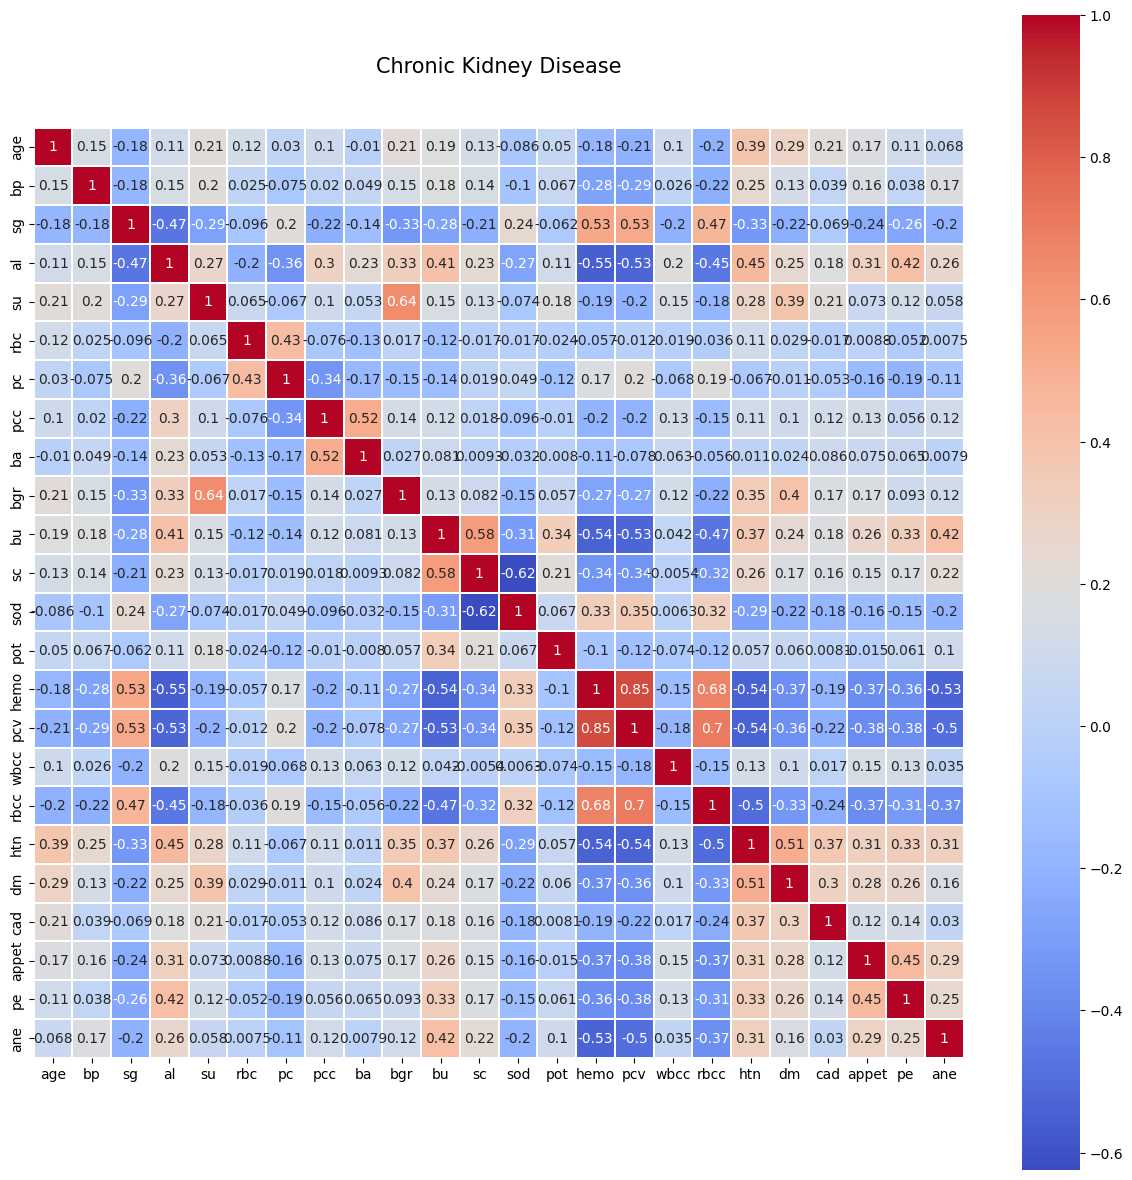

In [ ]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(15,15))
plt.title('Chronic Kidney Disease', y=1.05, size=15)
sb.heatmap(X.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Porcentaje 80% entrenamiento y 20% prueba

In [256]:
XTrainTree, XTestTree, yTrainTree, yTestTree=train_test_split(X,y,test_size=0.2, stratify=y,random_state=42)

escalar=MinMaxScaler()
XTrainTree=escalar.fit_transform(XTrainTree)
XTestTree=escalar.transform(XTestTree)

modeloArbol=DecisionTreeClassifier(max_depth=8) # DecisionTreeClassifier(max_depth=3) establece la profundidad del árbol en 3
modeloArbol.fit(XTrainTree,yTrainTree)
yPredictArbol=modeloArbol.predict(XTrainTree)
print("Train Accuracy ",metrics.accuracy_score(yTrainTree,yPredictArbol))

yPredictArbol=modeloArbol.predict(XTestTree)
print("Test Accuracy ",metrics.accuracy_score(yTestTree,yPredictArbol))

Train Accuracy  1.0
Test Accuracy  0.9375


IDENTIFICAR LA PROFUNDIDAD ÓPTIMA PARA ESTE MODELO

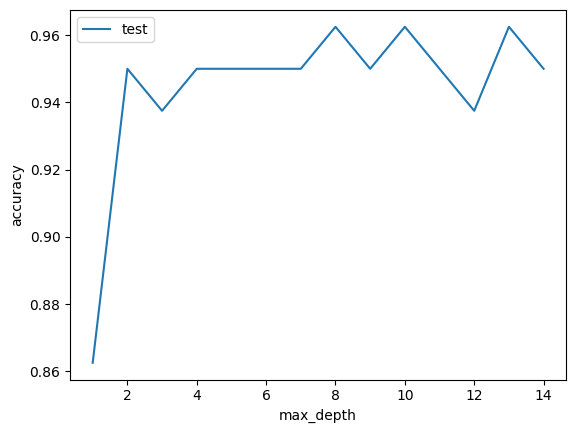

Optimal depth: 8
Accuracy: 0.9625


In [250]:
# lista de valores posibles para usar como max_depths
max_depths = list(range(1, 15))

# inicializar las listas para almacenar los resultados
train_scores = []
test_scores = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)

    # calcular la precisión del modelo utilizando la validación cruzada de 5-fold
    test_score = cross_val_score(dt, XTestTree, yTestTree, cv=5).mean()

    test_scores.append(test_score)

# graficar los resultados para visualizar la curva de complejidad
plt.plot(max_depths, test_scores, label='test')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# imprimir la profundidad óptima y la precisión asociada
best_depth = max_depths[test_scores.index(max(test_scores))]
best_score = max(test_scores)
print('Optimal depth:', best_depth)
print('Accuracy:', best_score)

[[50  0]
 [ 5 25]]


<Axes: >

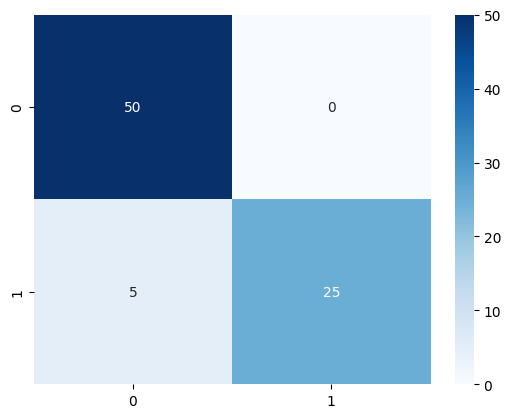

In [251]:
matrizArbol =confusion_matrix(yTestTree,yPredictArbol)
print(matrizArbol)
sb.heatmap(matrizArbol,annot=True,cmap="Blues")

In [257]:
precision_recall_fscore_support(yTestTree,yPredictArbol,average=None)
etiquetas=["ckd","notckd"]
print(classification_report(yTestTree,yPredictArbol,target_names=etiquetas))
reportArbol = classification_report(yTestTree,yPredictArbol,target_names=etiquetas)
accuracyArbol = modeloArbol.score(XTestTree,yTestTree)
caracteristicas=list(X)
print(caracteristicas)
print("Accuracy=",accuracyArbol)

              precision    recall  f1-score   support

         ckd       0.91      1.00      0.95        50
      notckd       1.00      0.83      0.91        30

    accuracy                           0.94        80
   macro avg       0.95      0.92      0.93        80
weighted avg       0.94      0.94      0.94        80

['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
Accuracy= 0.9375


In [258]:
export_graphviz(modeloArbol,out_file="arbol.dot",class_names=etiquetas,feature_names=caracteristicas,impurity=False,filled=True)

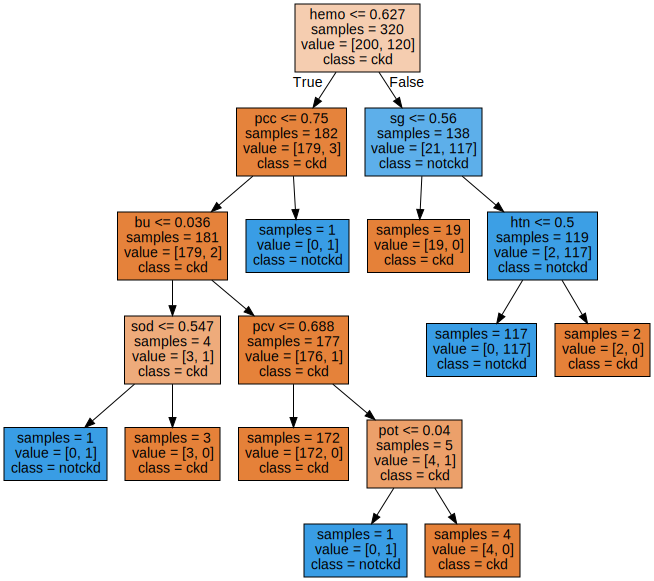

In [ ]:
with open("arbol.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

CON PCA

[[48  2]
 [ 3 27]]
              precision    recall  f1-score   support

         ckd       0.94      0.96      0.95        50
      notckd       0.93      0.90      0.92        30

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80

Train Accuracy:  1.0
Test Accuracy:  0.9375


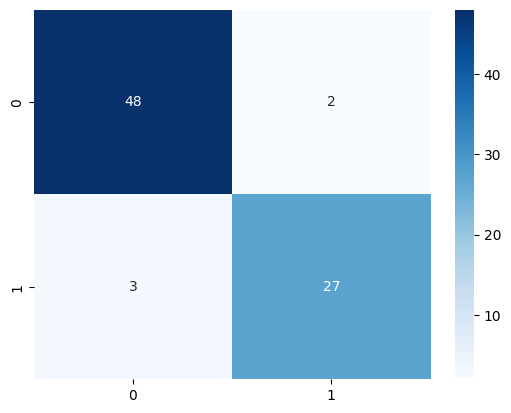

In [253]:
XTrainTree, XTestTree, yTrainTree, yTestTree=train_test_split(X,y,test_size=0.2, stratify=y,random_state=42)
pca = PCA(n_components=7)  # Establece el número de componentes principales a utilizar
modeloArbol = DecisionTreeClassifier(max_depth=8)

# Crear un pipeline que primero aplique PCA y luego el modelo de árbol de decisión
pipeline = Pipeline([
    ("pca", pca),
    ("arbol", modeloArbol)
])

#Normalización de los datos
escalar=MinMaxScaler()
XTrainTree=escalar.fit_transform(XTrainTree)
XTestTree=escalar.transform(XTestTree)

pipeline.fit(XTrainTree, yTrainTree)


yTrainPredict = pipeline.predict(XTrainTree)
yTestPredict = pipeline.predict(XTestTree)

matrizArbol =confusion_matrix(yTestTree,yTestPredict)
print(matrizArbol)
sb.heatmap(matrizArbol,annot=True,cmap="Blues")

precision_recall_fscore_support(yTestTree,yTestPredict,average=None)
etiquetas=["ckd","notckd"]
print(classification_report(yTestTree,yTestPredict,target_names=etiquetas))

print("Train Accuracy: ", metrics.accuracy_score(yTrainTree, yTrainPredict))
print("Test Accuracy: ", metrics.accuracy_score(yTestTree, yTestPredict))


SABER CUÁL ES EL NUMERO DE COMPONENTES MÁS ÓPTIMO

In [246]:
# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(XTrainTree, yTrainTree, test_size=0.2,random_state=42)

# Especifica una lista de valores para n_components que deseas probar
n_components_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

best_accuracy = 0
best_n_components = None

for n_components in n_components_values:
    # Crea un modelo PCA con el número de componentes actual
    pca = PCA(n_components=n_components)

    # Crea un modelo de árbol de decisión
    modelo_arbol = DecisionTreeClassifier(max_depth=8)

    # Crea un pipeline que primero aplique PCA y luego el modelo de árbol de decisión
    pipeline = Pipeline([
        ("pca", pca),
        ("arbol", modelo_arbol)
    ])

    # Realiza validación cruzada con 5 particiones (puedes ajustar esto)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calcula el promedio de las puntuaciones de validación cruzada
    mean_accuracy = scores.mean()

    # Actualiza el mejor número de componentes si encontramos un modelo mejor
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_n_components = n_components

# Ajusta el mejor modelo encontrado en el conjunto de prueba
best_pca = PCA(n_components=best_n_components)
best_modelo_arbol = DecisionTreeClassifier(max_depth=3)
best_pipeline = Pipeline([
    ("pca", best_pca),
    ("arbol", best_modelo_arbol)
])
best_pipeline.fit(X_train, y_train)

# Evalúa el modelo en el conjunto de prueba
test_accuracy = best_pipeline.score(X_test, y_test)

print("El número óptimo de componentes es:", best_n_components)
print("Precisión en el conjunto de prueba con el mejor modelo:", test_accuracy)

El número óptimo de componentes es: 7
Precisión en el conjunto de prueba con el mejor modelo: 1.0
